# ${\color{Blue}{ชื่อหัวข้อ \ (Project \ Topic):  }}$  การแยกคนที่มีสุขภาพดีออกจากคนที่ป่วยเป็นโรคพาร์กินสันโดยใช้ SVM

## ชื่อทีม (Team name) :  กลุ่ม 6
### สมาชิก (Members) : 

1.   *นายวราวุฒิ มะลิผล		623021035-2*
2.   *นายศุภโชค คำตะลา 		643020492-1*




## ${\color{blue}{ แรงบรรดาลใจในการเลือกหัวข้อนี้ \ (Motivation): }}$


เนื่องจากโรคพาร์กินสันนั้นมีทั้งพาร์กินสันแท้ที่เกิดจากความสื่อมของระบบประสาทและพาร์กินสันเทียมที่เป็นอาการเพียงชั่วคราวทางเราจึงต้องการที่จะแยกคนที่สุขภาพดีออกจากคนที่เป็นผู้ป่วยพาร์กินสัน

#${\color{purple}{คำถามที่น่าสนใจเกี่ยวกับปัญหา \ (Interested \ Questions) :}}$ 

ลิตส์ของคำถามที่นักศึกษาร่วมกันอภิปรายแล้วให้ความสนใจ และต้องการหาคำตอบโดยอาศัยกระบวนการ Data Engineering and Data Science 

---

1.   การแยกคนสุขภาพดีออกจากผู้ป่วยพาร์กินสัน
2.   อัลกอริทึมไหนของ machine learning ที่มีประสิทธิภาพที่สุดสำหรับชุดข้อมูลนี้



---




# ${\color{purple}{ข้อมูลที่เกี่ยวข้องในการใช้ตอบคำถามที่สนใจ}}$ ${\color{purple}{\ What \ are \ the \ Data \ related \ to \ answer \ the  \ questions? :}}$ 




*   ชุดข้อมูลการวัดคลื่นเสียงของผู้ป่วยพาร์กินสันและของคนปกติ
*   อัลกอริทึมที่นำมาใช้เปรียบเทียบมีทั้งหมด 5 อัลกอริทึม ได้แก่ SVM, Decision Tree, Logistic Regression, KNN และ SGD Classifier



# (OPTION 1) ${\color{pink}{ข้อมูลที่จะนำมาวิเคราะห์ \ (Dataset): }}$

 


Parkinsons Data Set

## ${\color{pink}{แหล่งที่มาของข้อมูล:}}$


https://archive.ics.uci.edu/ml/datasets/parkinsons

## ${\color{pink}{คำอธิบายเกี่ยวกับข้อมูล โดยคร่าว:}}$
  
  

ข้อมูลของโรคพาร์กินสัน ประกอบไปด้วยข้อมูลดังนี้

1) name เป็นชื่อบุคคลแบบ ASCII และหมายเลขบันทึก

2) MDVP:Fo(Hz) เป็นค่าเฉลี่ยความถี่เสียงพื้นฐาน

3) MDVP:Fhi(Hz) เป็นค่าสูงสุดของความถี่เสียงพื้นฐาน

4) MDVP:Flo(Hz) เป็นค่าน้อยสุดของความถี่เสียงพื้นฐาน

5-9) MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP เป็นวิธีการวัดการเปลี่ยนแปลงหลายอย่างในความถี่พื้นฐาน

10-15) MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA เป็นวิธีการวัดการเปลี่ยนแปลงหลายอย่างในแอมพลิจูด

16-17) NHR, HNR เป็นวิธีการวัดอัตราส่วนระหว่างเสียงและส่วนประกอบเสียง 2 อย่าง

18) status เป็นสถานะสุขภาพของบุคคล โดยแบ่งเป็น (1) เป็นโรคพาร์กินสัน (0) มีสุขภาพดี

19-20) RPDE, D2 เป็นวิธีการวัดความซับซ้อนแบบไดนามิกที่ไม่เป็นเชิงเส้น 2 อย่าง

21) DFA เป็นดัชนีมาตราส่วนเศษส่วนของสัญญาณ

22-24) spread1, spread2, PPE - วิธีการวัดการเปลี่ยนแปลงของความถี่พื้นฐานที่ไม่เป็นเชิงเส้น 3 อย่าง


# ${\color{darkGrey}{Exploratory \ Data \  Analysis :}}$


## ${\color{Grey}{1) \ Data \ acquisition \ process :}}$

*   ทำการดาวน์โหลดข้อมูลที่เป็น csv จากเว็บไซต์ uci โดยตรง






In [ ]:
#@title Scrap/ Load and Preparing Data Set into Pandas DataFrame 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df.sample(5)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
182  phon_R01_S44_6      149.818       163.417       144.786         0.00336   
98   phon_R01_S24_2      125.791       140.557        96.206         0.01378   
40   phon_R01_S08_5      186.163       197.724       177.584         0.00298   
107  phon_R01_S25_5      151.884       157.765       133.751         0.00258   
31   phon_R01_S07_2      199.228       209.512       192.091         0.00241   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
182           0.00002   0.00174   0.00198     0.00521       0.02145  ...   
98            0.00011   0.00826   0.00655     0.02478       0.04689  ...   
40            0.00002   0.00165   0.00175     0.00496       0.01495  ...   
107           0.00002   0.00115   0.00122     0.00346       0.01450  ...   
31            0.00001   0.00134   0.00138     0.00402       0.01015  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
182      0.03464  0.00595  23.008       1  0.329577  0.757180 -6.277170   
98       0.07625  0.10323  15.433       1  0.571010  0.690892 -5.159169   
40       0.02321  0.00231  26.822       1  0.326480  0.765623 -6.647379   
107      0.01898  0.00659  26.833       1  0.393563  0.700246 -6.600023   
31       0.01513  0.00167  30.940       0  0.432439  0.742055 -7.682587   

      spread2        D2       PPE  
182  0.109397  2.209021  0.156368  
98   0.202146  2.441612  0.260375  
40   0.201095  2.374073  0.130554  
107  0.249172  2.499148  0.105306  
31   0.173319  2.103106  0.068501  

[5 rows x 24 columns]

## ${\color{Grey}{2) \ Data \ cleaning \ process :}}$


In [ ]:
#@title Drop non features & Move target to last column

# drop name
df.drop(columns=['name'], axis=1, inplace=True)

# move status
new_col_idx = list(df.columns.drop(['status']))
new_col_idx.append('status')
df = df.reindex(new_col_idx, axis=1)

df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 23 columns]

### Checking Data Types & Missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [ ]:
df['status'] = df['status'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MDVP:Fo(Hz)       195 non-null    float64 
 1   MDVP:Fhi(Hz)      195 non-null    float64 
 2   MDVP:Flo(Hz)      195 non-null    float64 
 3   MDVP:Jitter(%)    195 non-null    float64 
 4   MDVP:Jitter(Abs)  195 non-null    float64 
 5   MDVP:RAP          195 non-null    float64 
 6   MDVP:PPQ          195 non-null    float64 
 7   Jitter:DDP        195 non-null    float64 
 8   MDVP:Shimmer      195 non-null    float64 
 9   MDVP:Shimmer(dB)  195 non-null    float64 
 10  Shimmer:APQ3      195 non-null    float64 
 11  Shimmer:APQ5      195 non-null    float64 
 12  MDVP:APQ          195 non-null    float64 
 13  Shimmer:DDA       195 non-null    float64 
 14  NHR               195 non-null    float64 
 15  HNR               195 non-null    float64 
 16  RPDE              195 non-

ไม่มี missing values ในข้อมูลชุดนี้

### Map data to a normal distribution

In [ ]:
def distribution_plot(data):
    sncp_c1 = sns.color_palette("bright", 20)
    fig, ax = plt.subplots(figsize = (20, 35))

    for n, col in enumerate(data.columns):
        try:
            if (data[col].dtype.name == 'int64' or data[col].dtype.name == 'float64'): 
                plt.subplot(np.ceil(data.shape[1]/3), 3, n+1)
                sns.distplot(data[col], color=sncp_c1[n-3], kde = True)
                plt.title(f"\nDistribution of {col} (skew = {data[col].skew():.3f})\n", fontdict=dict(fontsize=15))
                plt.tight_layout();
            else:
                pass 
        
        except IndexError:
            pass

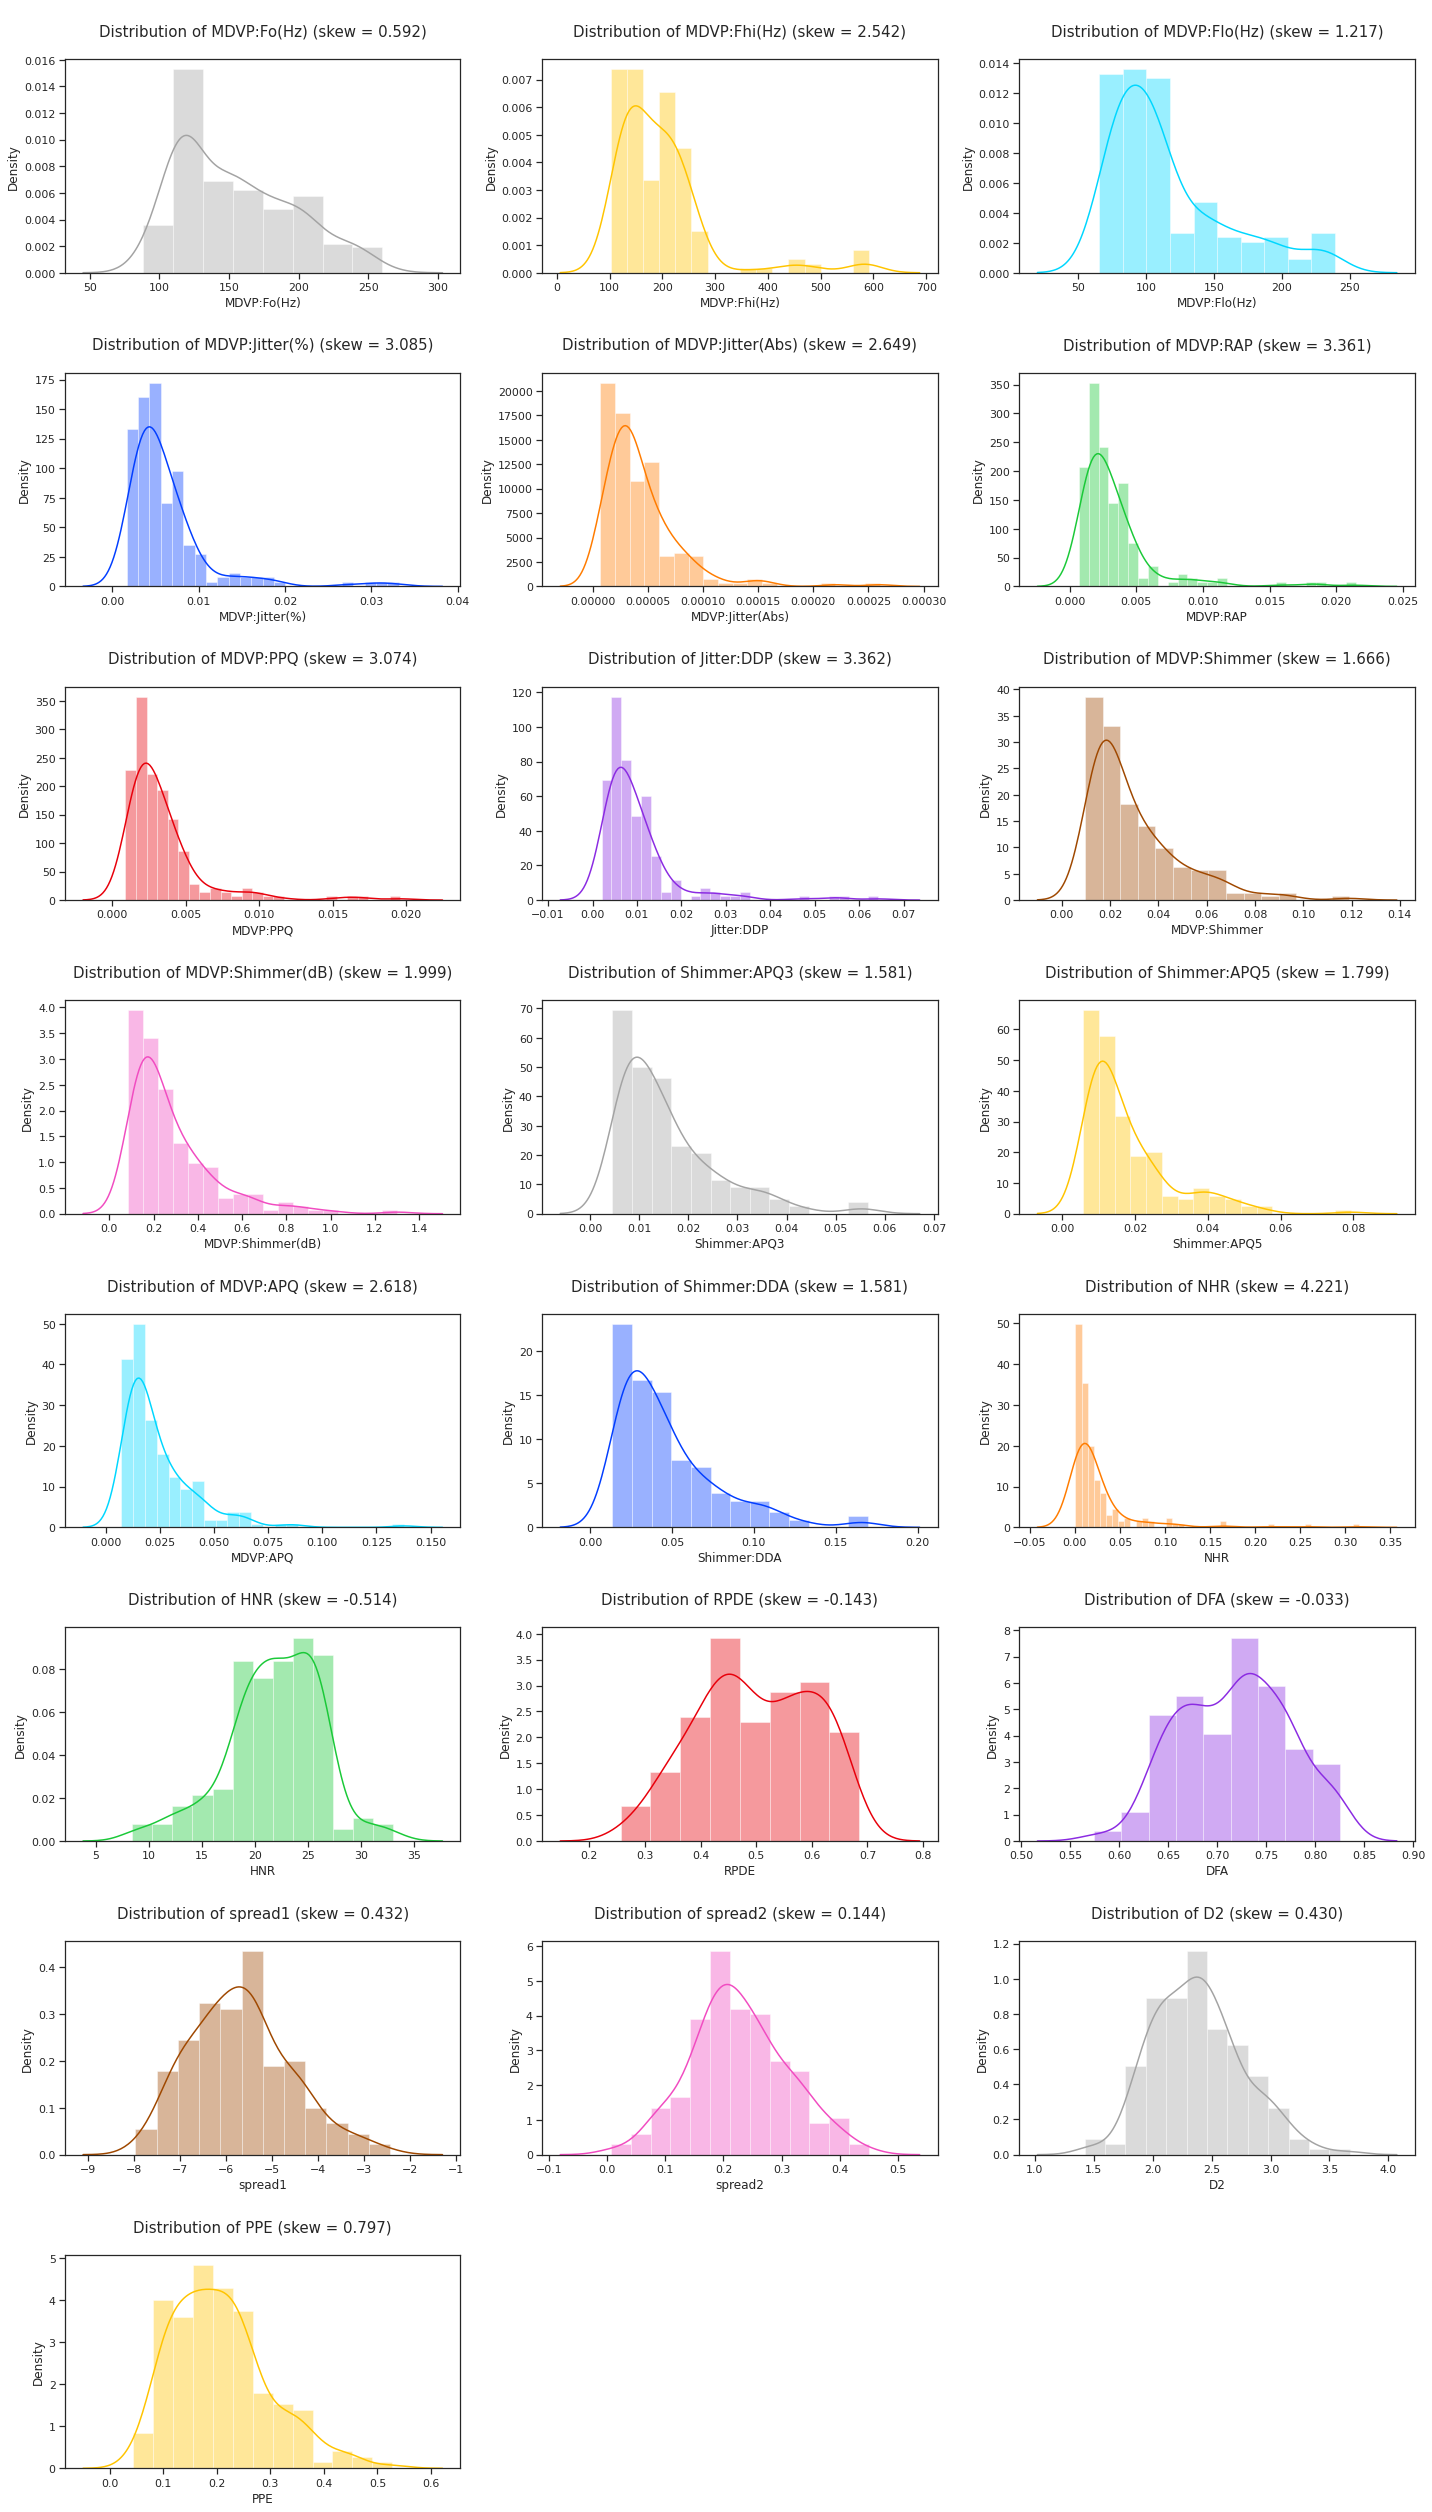

In [ ]:
distribution_plot(df)

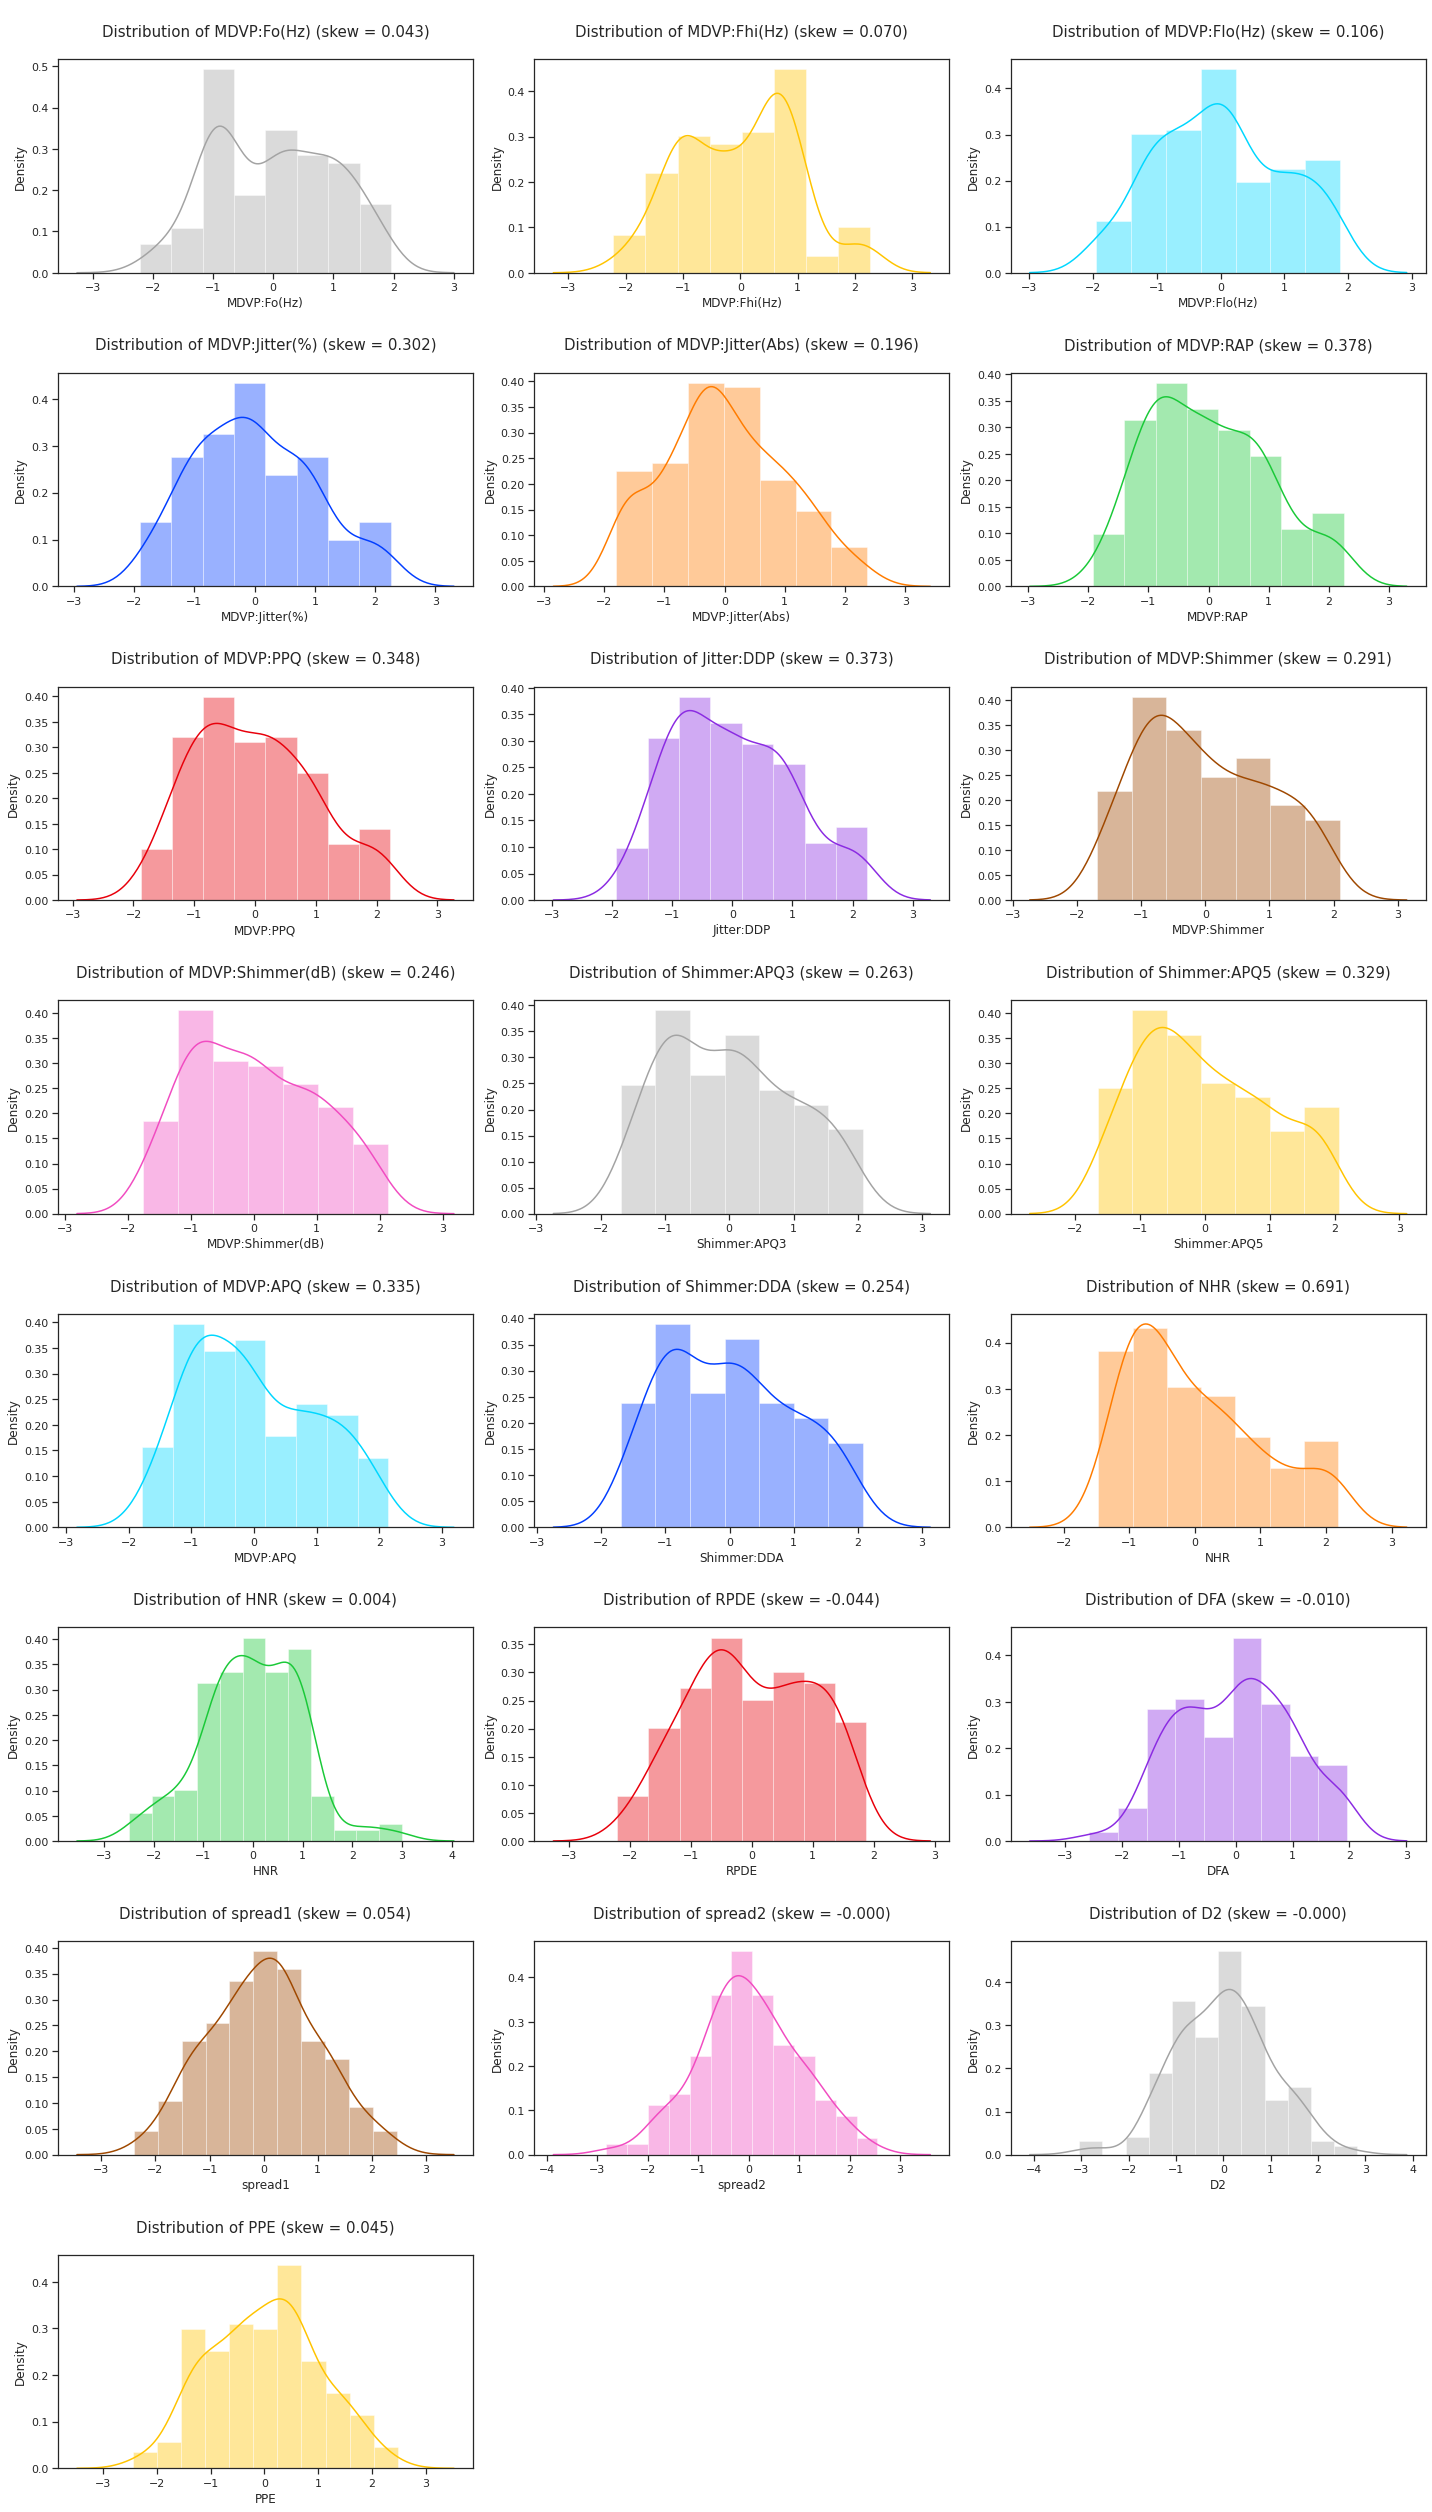

In [ ]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method="yeo-johnson")
tfm_data = transformer.fit_transform(df.drop(['status'], axis=1).values)

df_yj = pd.DataFrame(tfm_data, columns=df.columns.drop('status'))
df_yj['status'] = df['status']
distribution_plot(df_yj)

## ${\color{Grey} {3) \ Explore \ Global \ Properties:}} $

In [ ]:
#@title Print size of data
print('Number of rows = %d' % (df_yj.shape[0]))
print('Number of columns = %d' % (df_yj.shape[1]))

Number of rows = 195
Number of columns = 23


In [ ]:
#@title View Summary Statistics (before tranformation)
df.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [ ]:
#@title View Summary Statistics (after tranformation)
df_yj.describe().transpose()

count          mean       std       min       25%       50%  \
MDVP:Fo(Hz)       195.0  7.501692e-15  1.002574 -2.212383 -0.902961  0.054788   
MDVP:Fhi(Hz)      195.0 -7.998161e-15  1.002574 -2.216081 -0.898012  0.060352   
MDVP:Flo(Hz)      195.0  1.499655e-14  1.002574 -1.947132 -0.775905  0.008805   
MDVP:Jitter(%)    195.0 -6.012285e-16  1.002574 -1.899924 -0.765760 -0.062053   
MDVP:Jitter(Abs)  195.0 -1.184238e-16  1.002574 -1.792507 -0.877043 -0.311253   
MDVP:RAP          195.0  8.198570e-17  1.002574 -1.923162 -0.798339 -0.079307   
MDVP:PPQ          195.0  9.109522e-17  1.002574 -1.882563 -0.792088 -0.072610   
Jitter:DDP        195.0  5.283523e-16  1.002574 -1.929467 -0.797050 -0.080479   
MDVP:Shimmer      195.0 -2.277381e-16  1.002574 -1.695479 -0.803609 -0.164673   
MDVP:Shimmer(dB)  195.0 -4.327023e-17  1.002574 -1.763716 -0.833592 -0.071422   
Shimmer:APQ3      195.0 -1.821904e-17  1.002574 -1.688285 -0.846065 -0.057431   
Shimmer:APQ5      195.0  3.370523e-16  1.002574 -1.655445 -0.823326 -0.176137   
MDVP:APQ          195.0  5.693451e-17  1.002574 -1.781591 -0.817573 -0.169889   
Shimmer:DDA       195.0 -3.507166e-16  1.002574 -1.698767 -0.845279 -0.053967   
NHR               195.0  2.186285e-16  1.002574 -1.471354 -0.832124 -0.266095   
HNR               195.0 -7.287618e-17  1.002574 -2.501804 -0.677871 -0.027824   
RPDE              195.0 -4.463666e-16  1.002574 -2.202006 -0.762038 -0.056615   
DFA               195.0 -1.384647e-15  1.002574 -2.571948 -0.787680  0.069512   
spread1           195.0 -3.097238e-16  1.002574 -2.404043 -0.686368  0.039702   
spread2           195.0 -5.693451e-18  1.002574 -2.821187 -0.611956 -0.066554   
D2                195.0  3.744014e-15  1.002574 -3.046095 -0.716607  0.018214   
PPE               195.0 -3.643809e-17  1.002574 -2.435260 -0.759551  0.007199   

                       75%       max  
MDVP:Fo(Hz)       0.810974  1.952995  
MDVP:Fhi(Hz)      0.740200  2.267894  
MDVP:Flo(Hz)      0.852432  1.875305  
MDVP:Jitter(%)    0.755711  2.261502  
MDVP:Jitter(Abs)  0.864844  2.367345  
MDVP:RAP          0.730513  2.246647  
MDVP:PPQ          0.708320  2.224229  
Jitter:DDP        0.731489  2.244912  
MDVP:Shimmer      0.826216  2.095092  
MDVP:Shimmer(dB)  0.793897  2.133370  
Shimmer:APQ3      0.819465  2.080861  
Shimmer:APQ5      0.812751  2.065571  
MDVP:APQ          0.779186  2.147241  
Shimmer:DDA       0.820083  2.081385  
NHR               0.700457  2.183998  
HNR               0.711891  2.998398  
RPDE              0.853902  1.877852  
DFA               0.791279  1.958394  
spread1           0.652185  2.472335  
spread2           0.649248  2.551756  
D2                0.713089  2.826430  
PPE               0.657084  2.476826

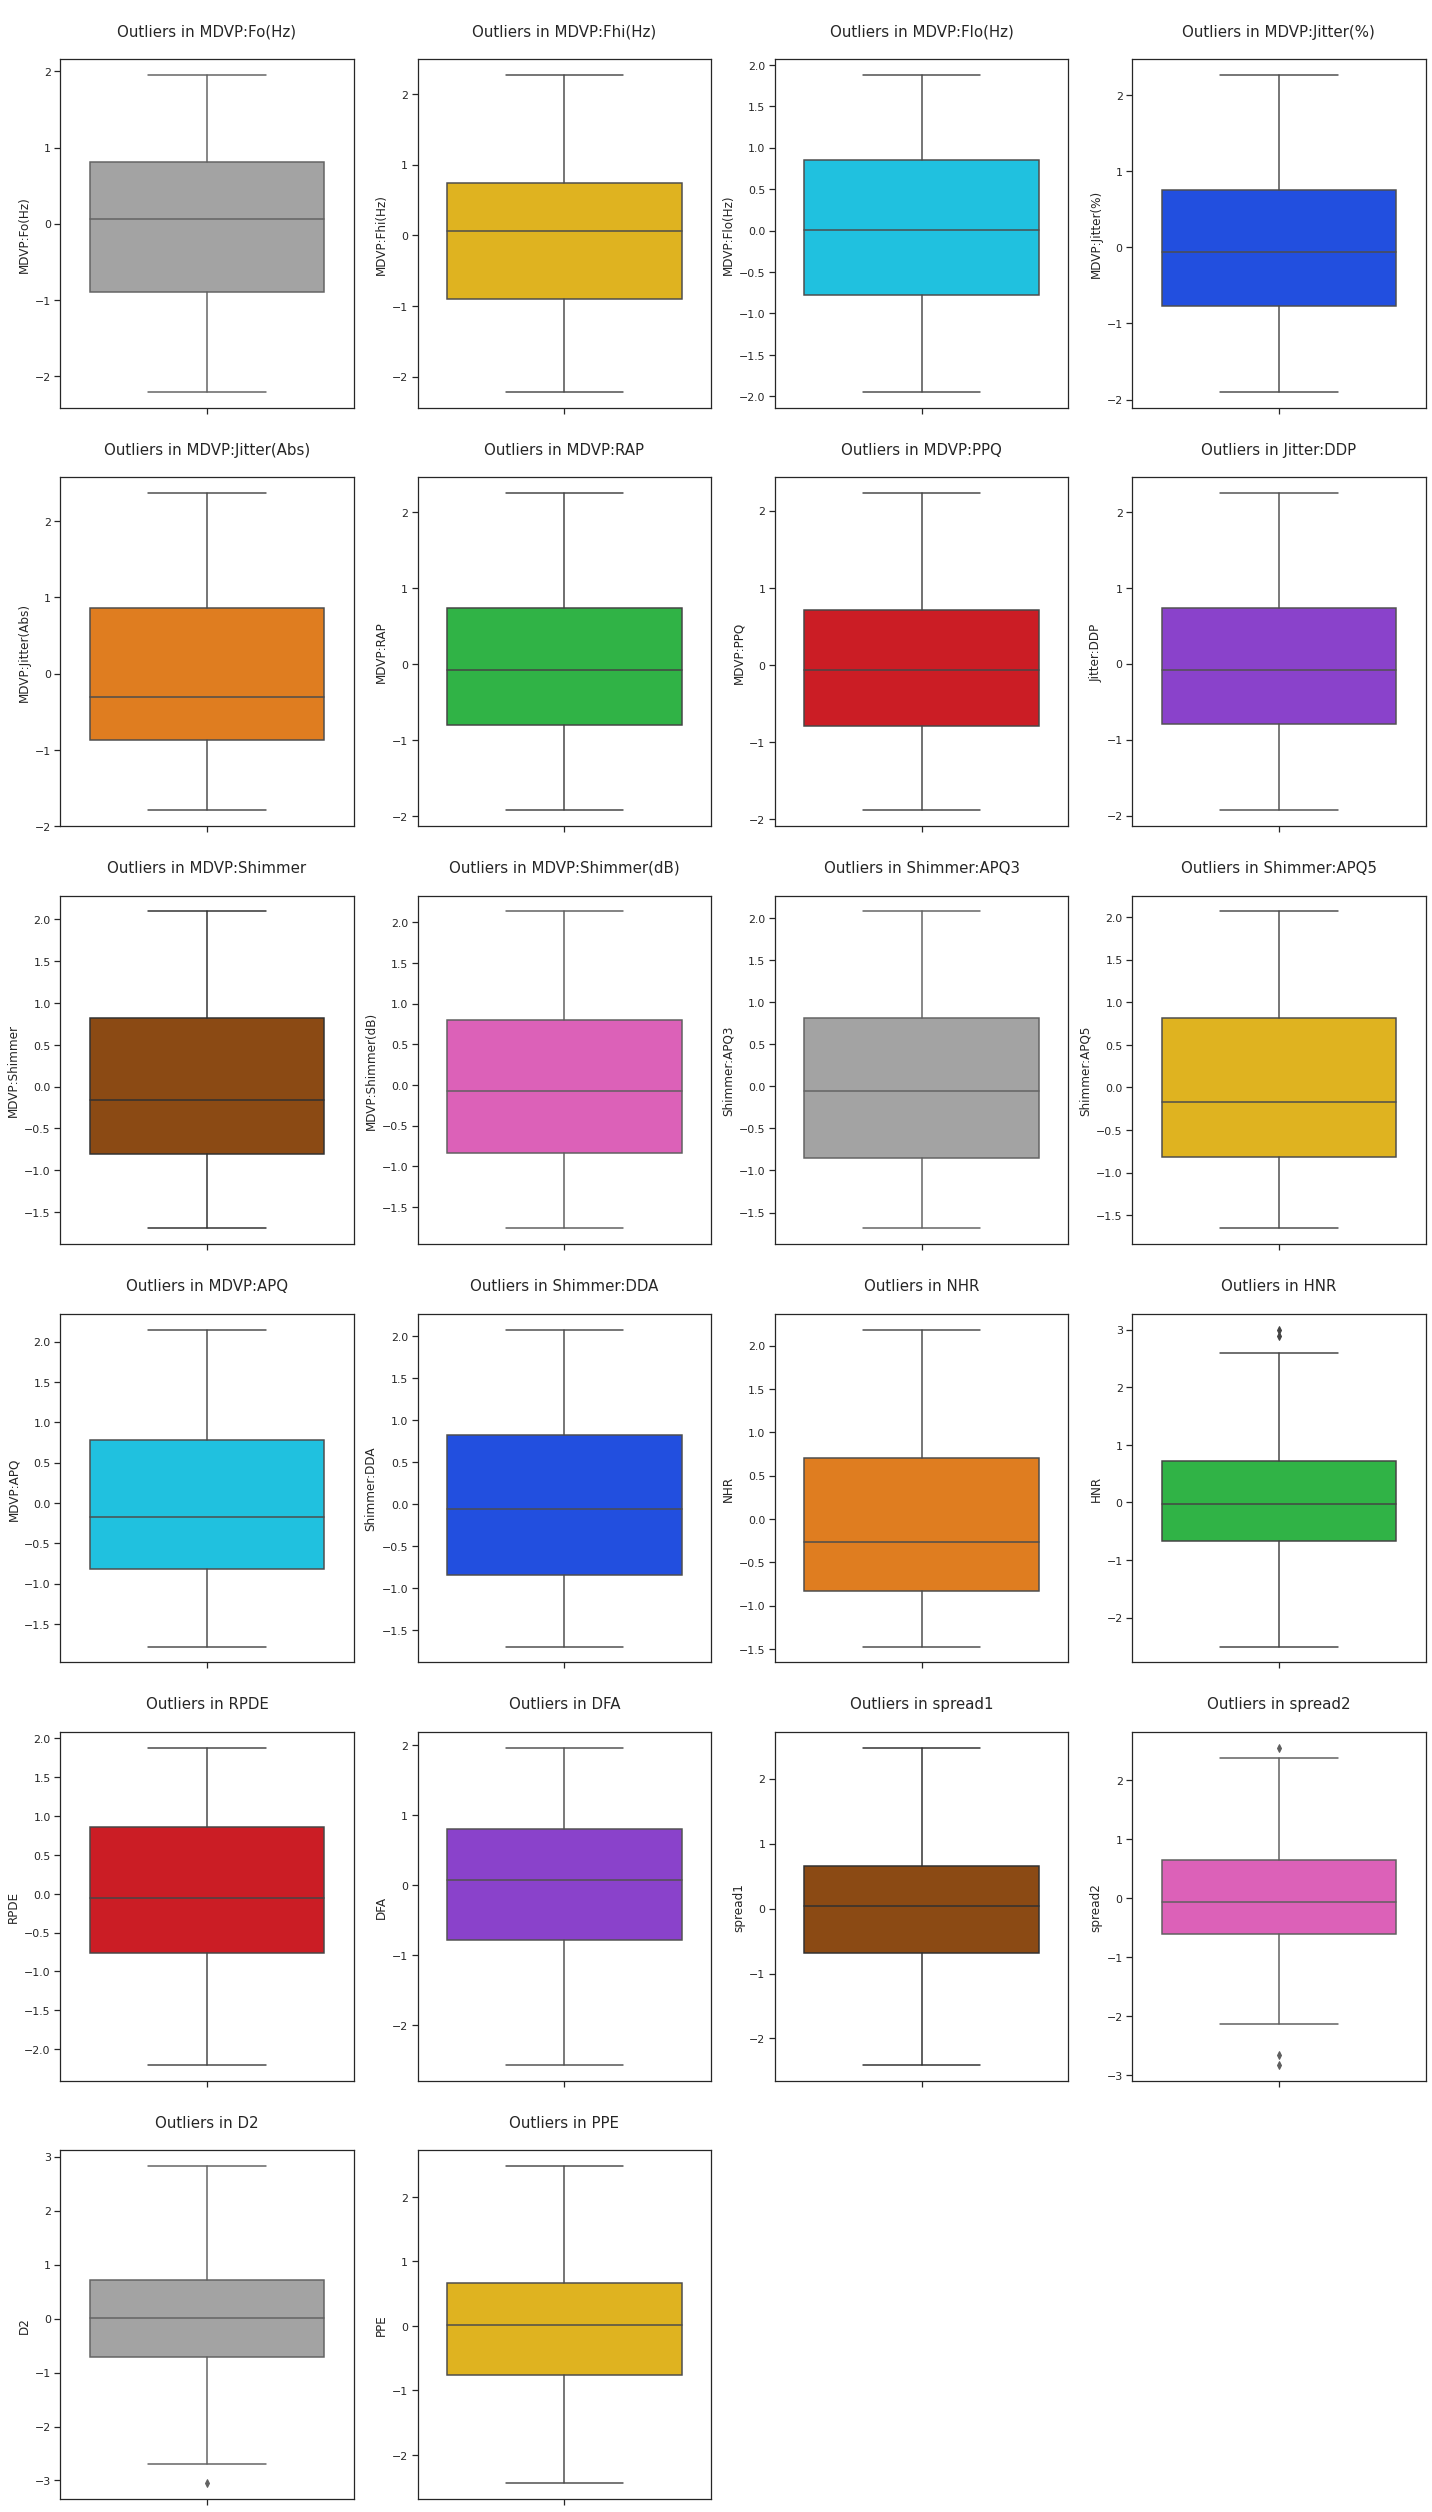

In [ ]:
#@title Plotting Outliers
sncp_c1 = sns.color_palette("bright", 20)
fig, ax = plt.subplots(figsize = (20, 35))
for n, col in enumerate(df_yj.columns):
    if col != 'status':
        plt.subplot(np.ceil(df_yj.shape[1]/4), 4, n+1)
        sns.boxplot(y=df_yj[col], color=sncp_c1[n-3])
        plt.title(f"\nOutliers in {col}\n",fontdict=dict(fontsize=15))
        plt.tight_layout();

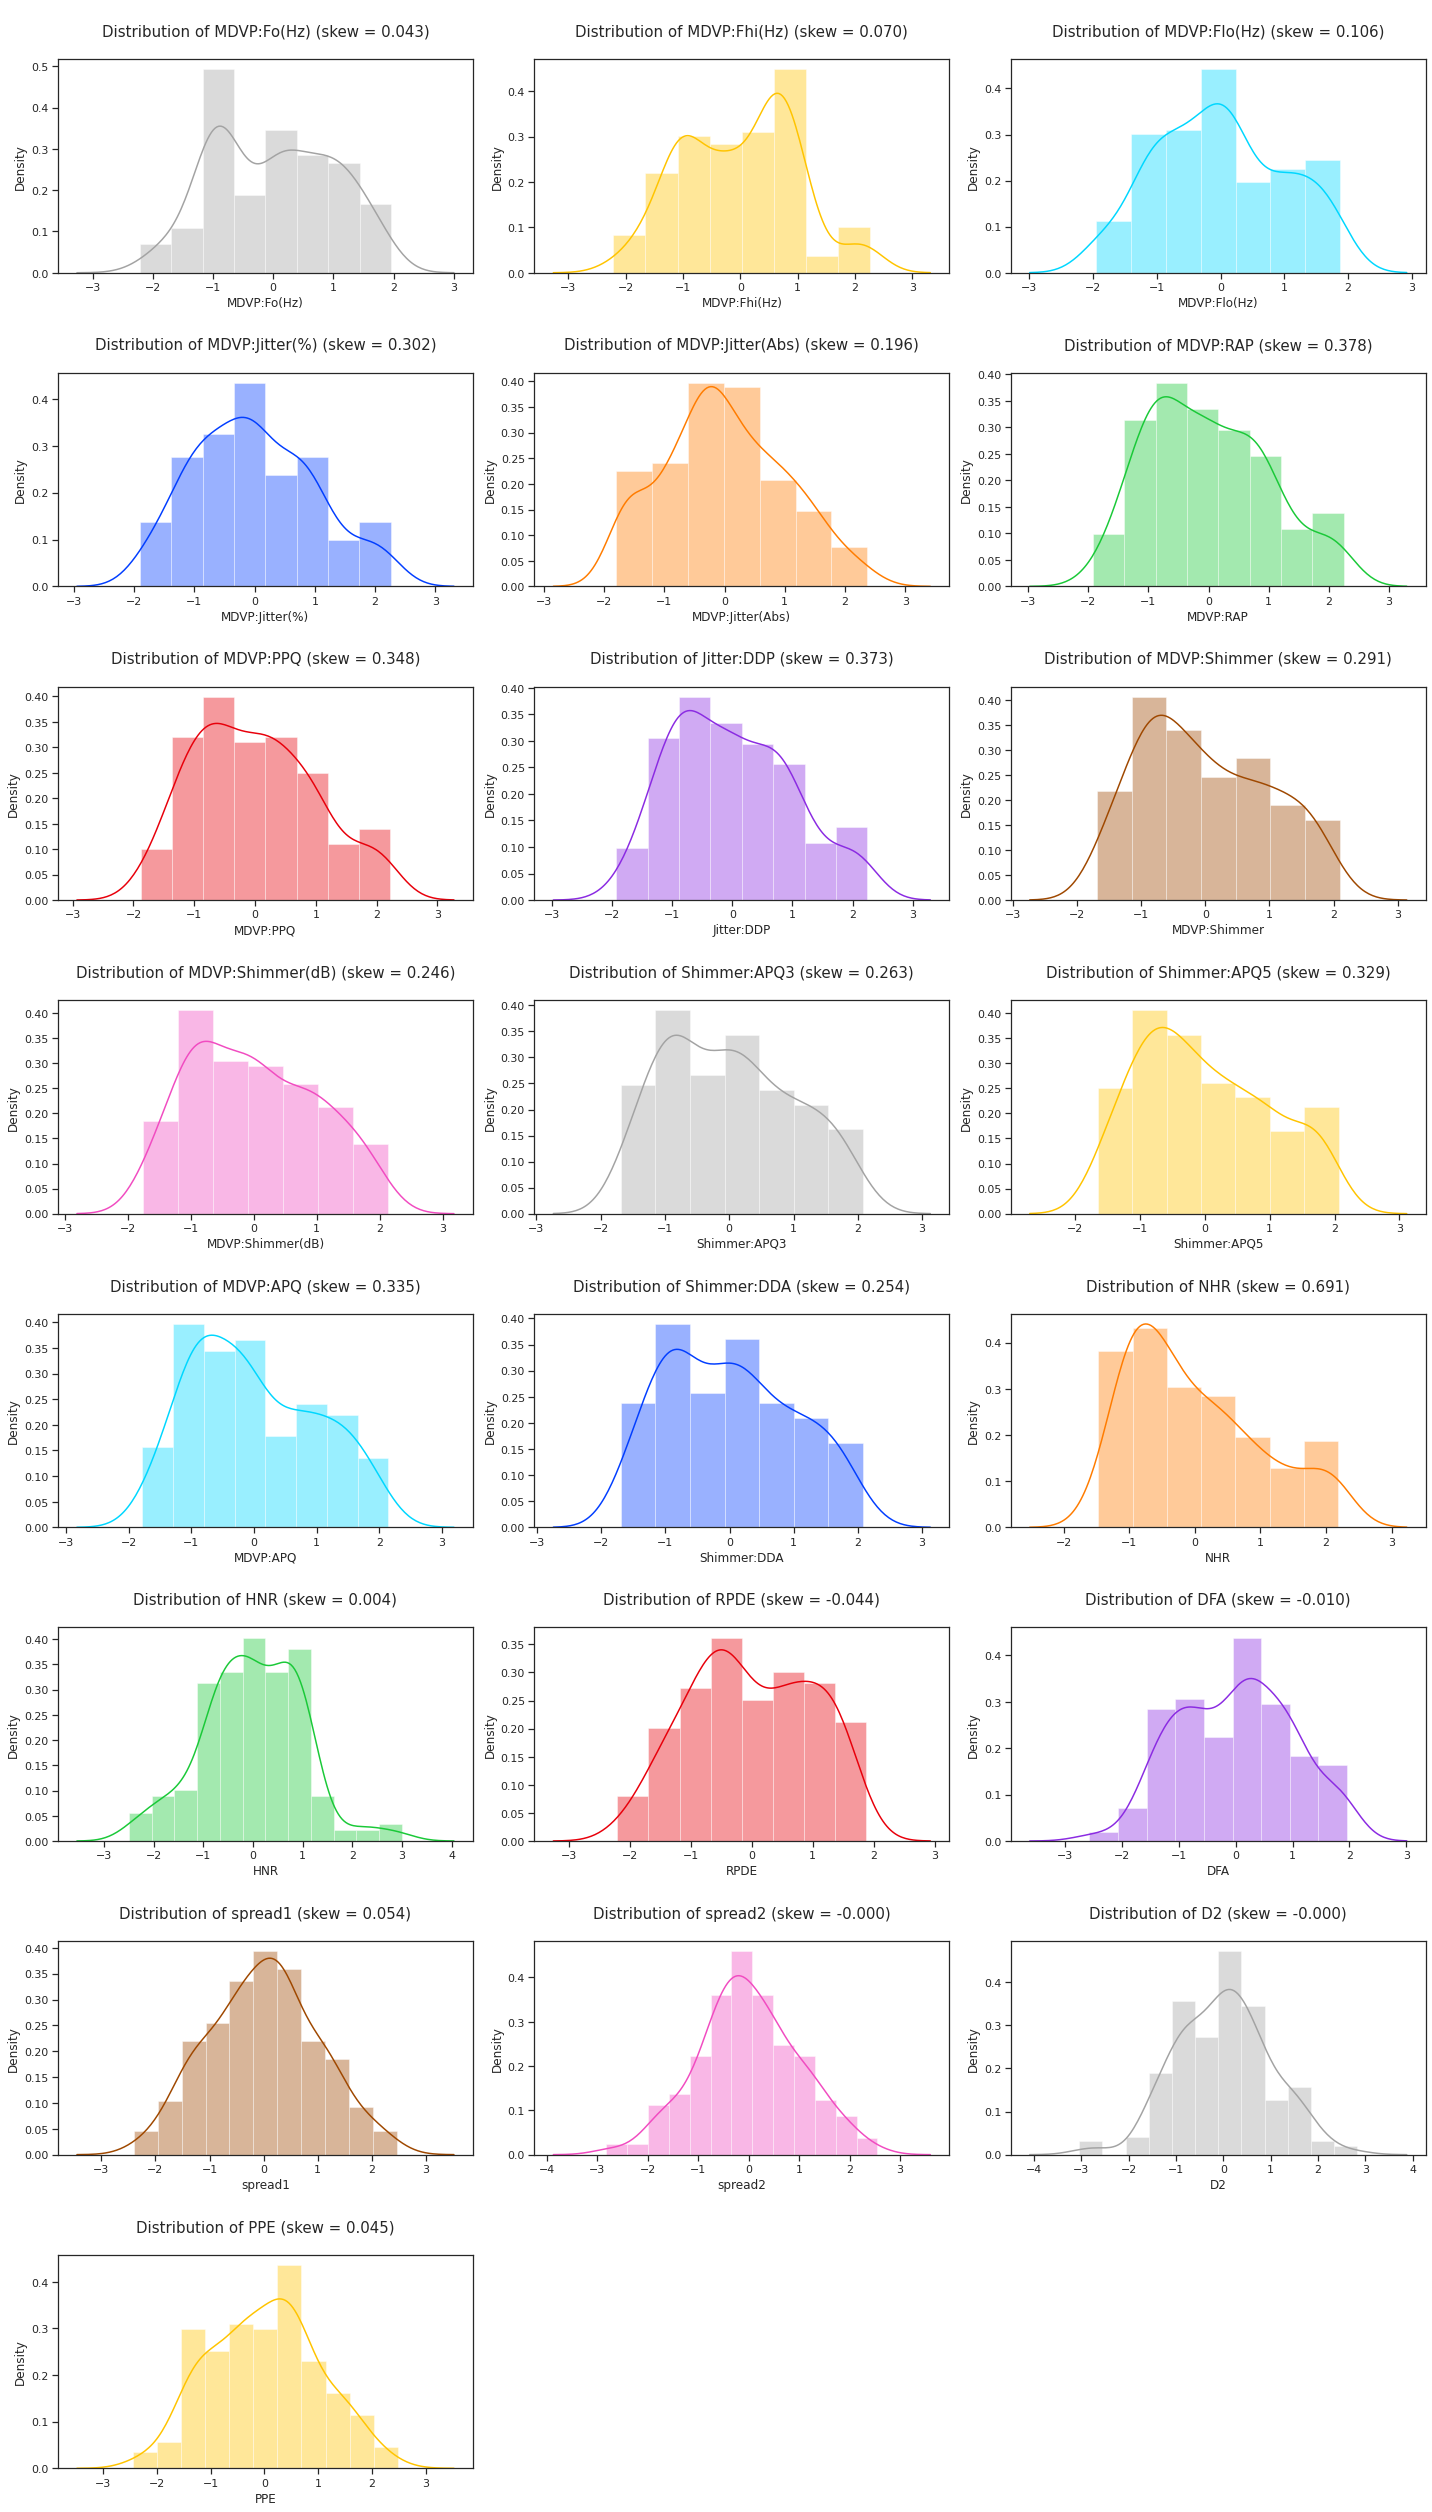

In [ ]:
#@title Plotting distribution of attributes
distribution_plot(df_yj)

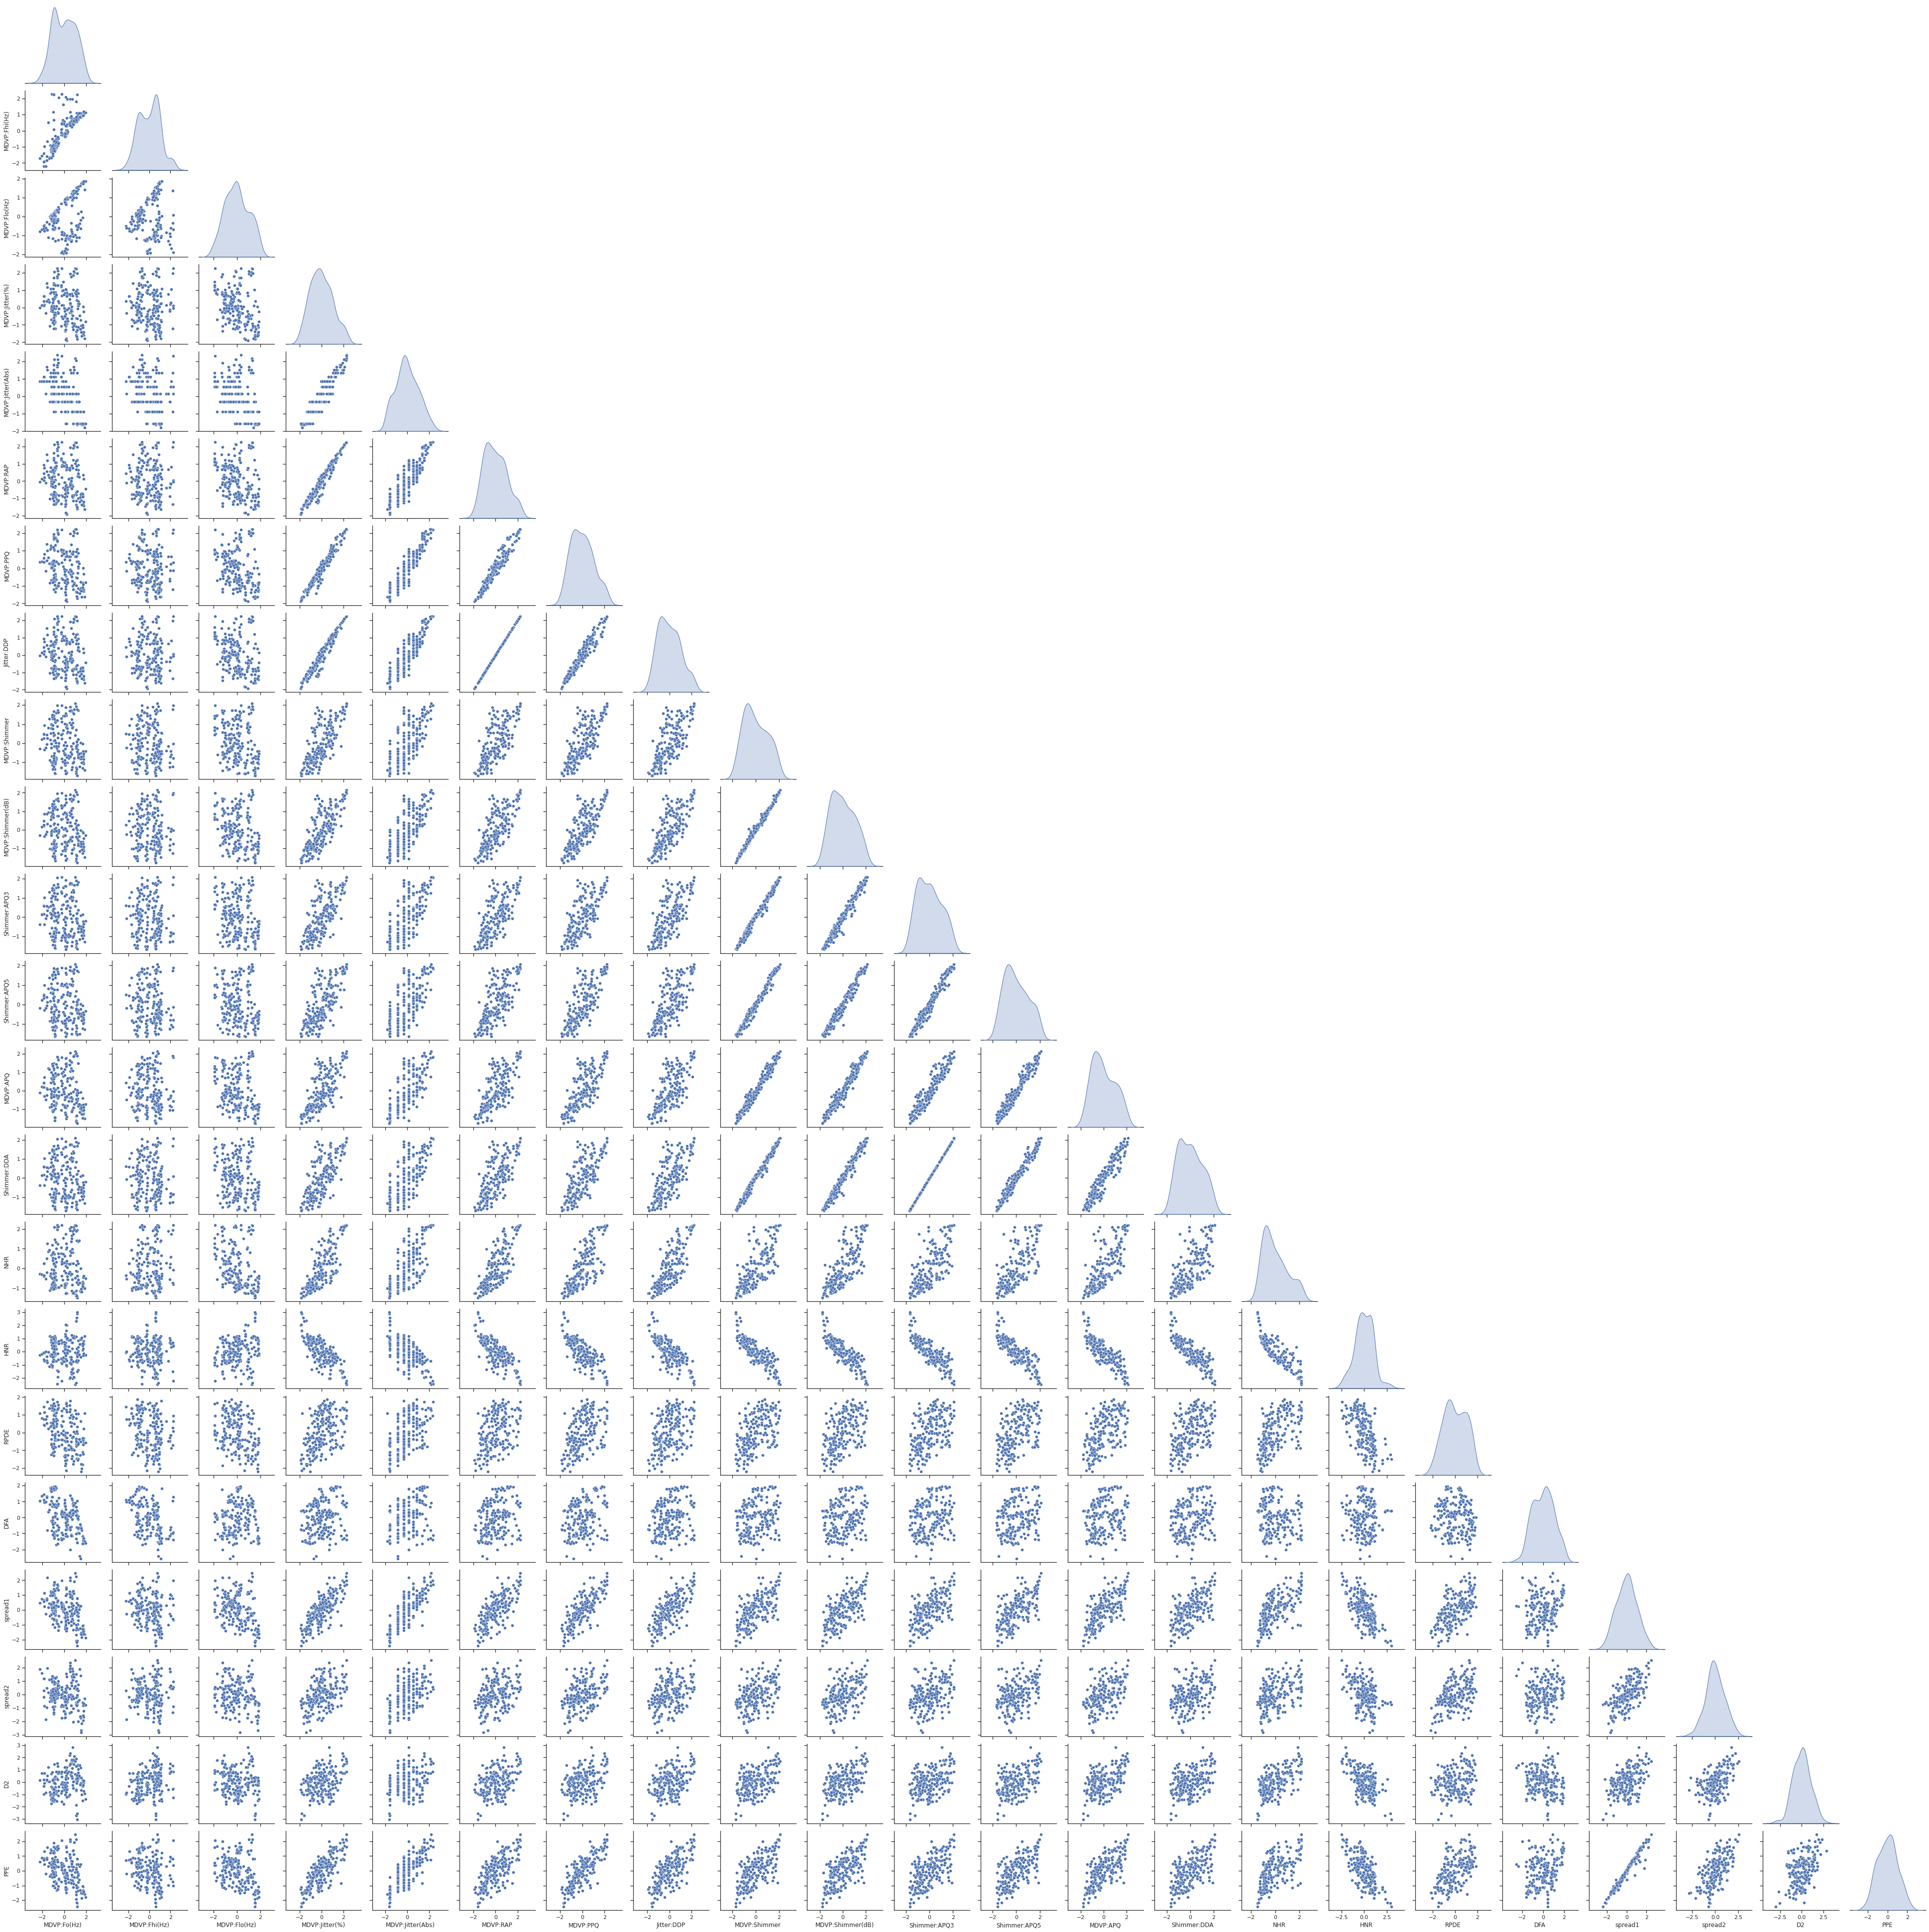

In [ ]:
#@title Visualizing Pairgrid of relation plot and distribution plot
g = sns.PairGrid(df_yj, height=2.5, diag_sharey=False, corner=True)
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)

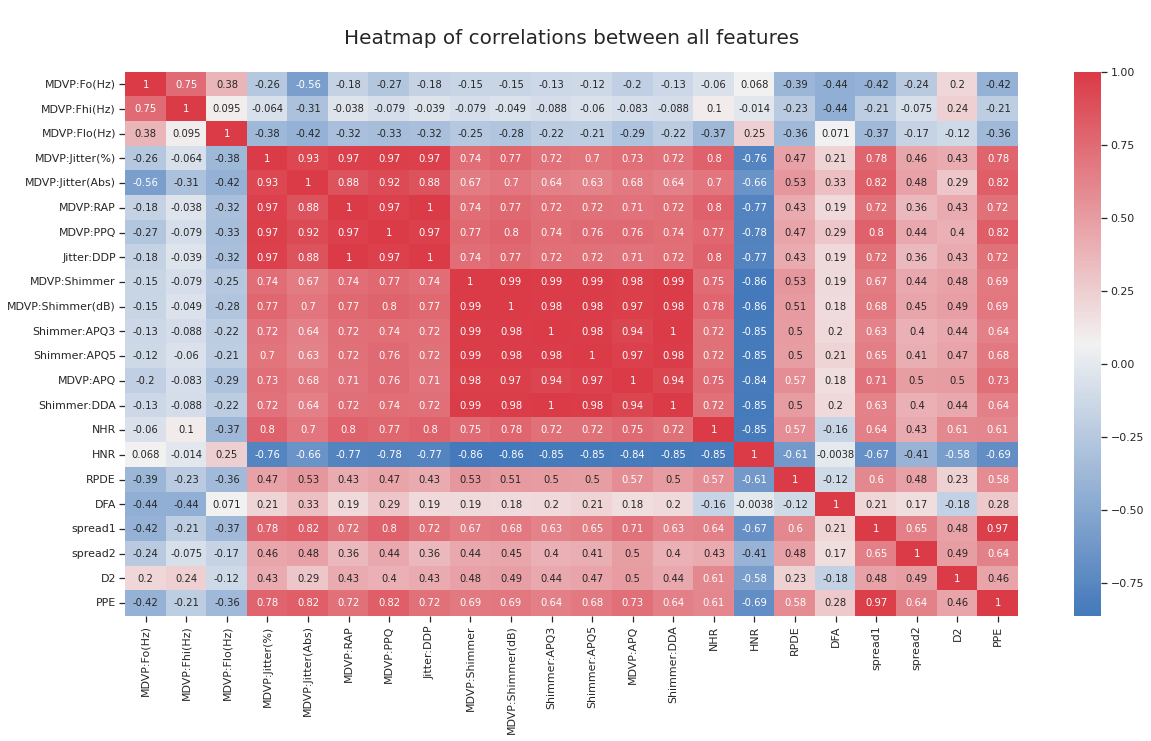

In [ ]:
#@title Plot Heatmap of correlations
fig,ax = plt.subplots(figsize=(20,10))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df_yj.corr(),cmap=cmap, annot=True);
plt.title("\nHeatmap of correlations between all features\n",{'fontsize':20});

## ${\color{Grey} {4) \ Explore \ Local \ Properties:}} $

number of people in data
status 0: 48
status 1: 147


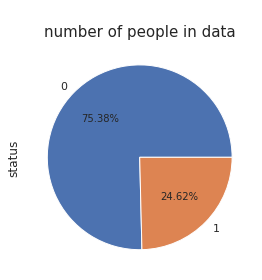

In [ ]:
#@title Display number of people in data
print('number of people in data')
print('status 0:', df_yj['status'].value_counts()[0])
print('status 1:', df_yj['status'].value_counts()[1])

df_yj['status'].value_counts().plot.pie(autopct='%.2f%%', labels=[0,1])
plt.title("\nnumber of people in data", fontdict=dict(fontsize=15))
plt.tight_layout()

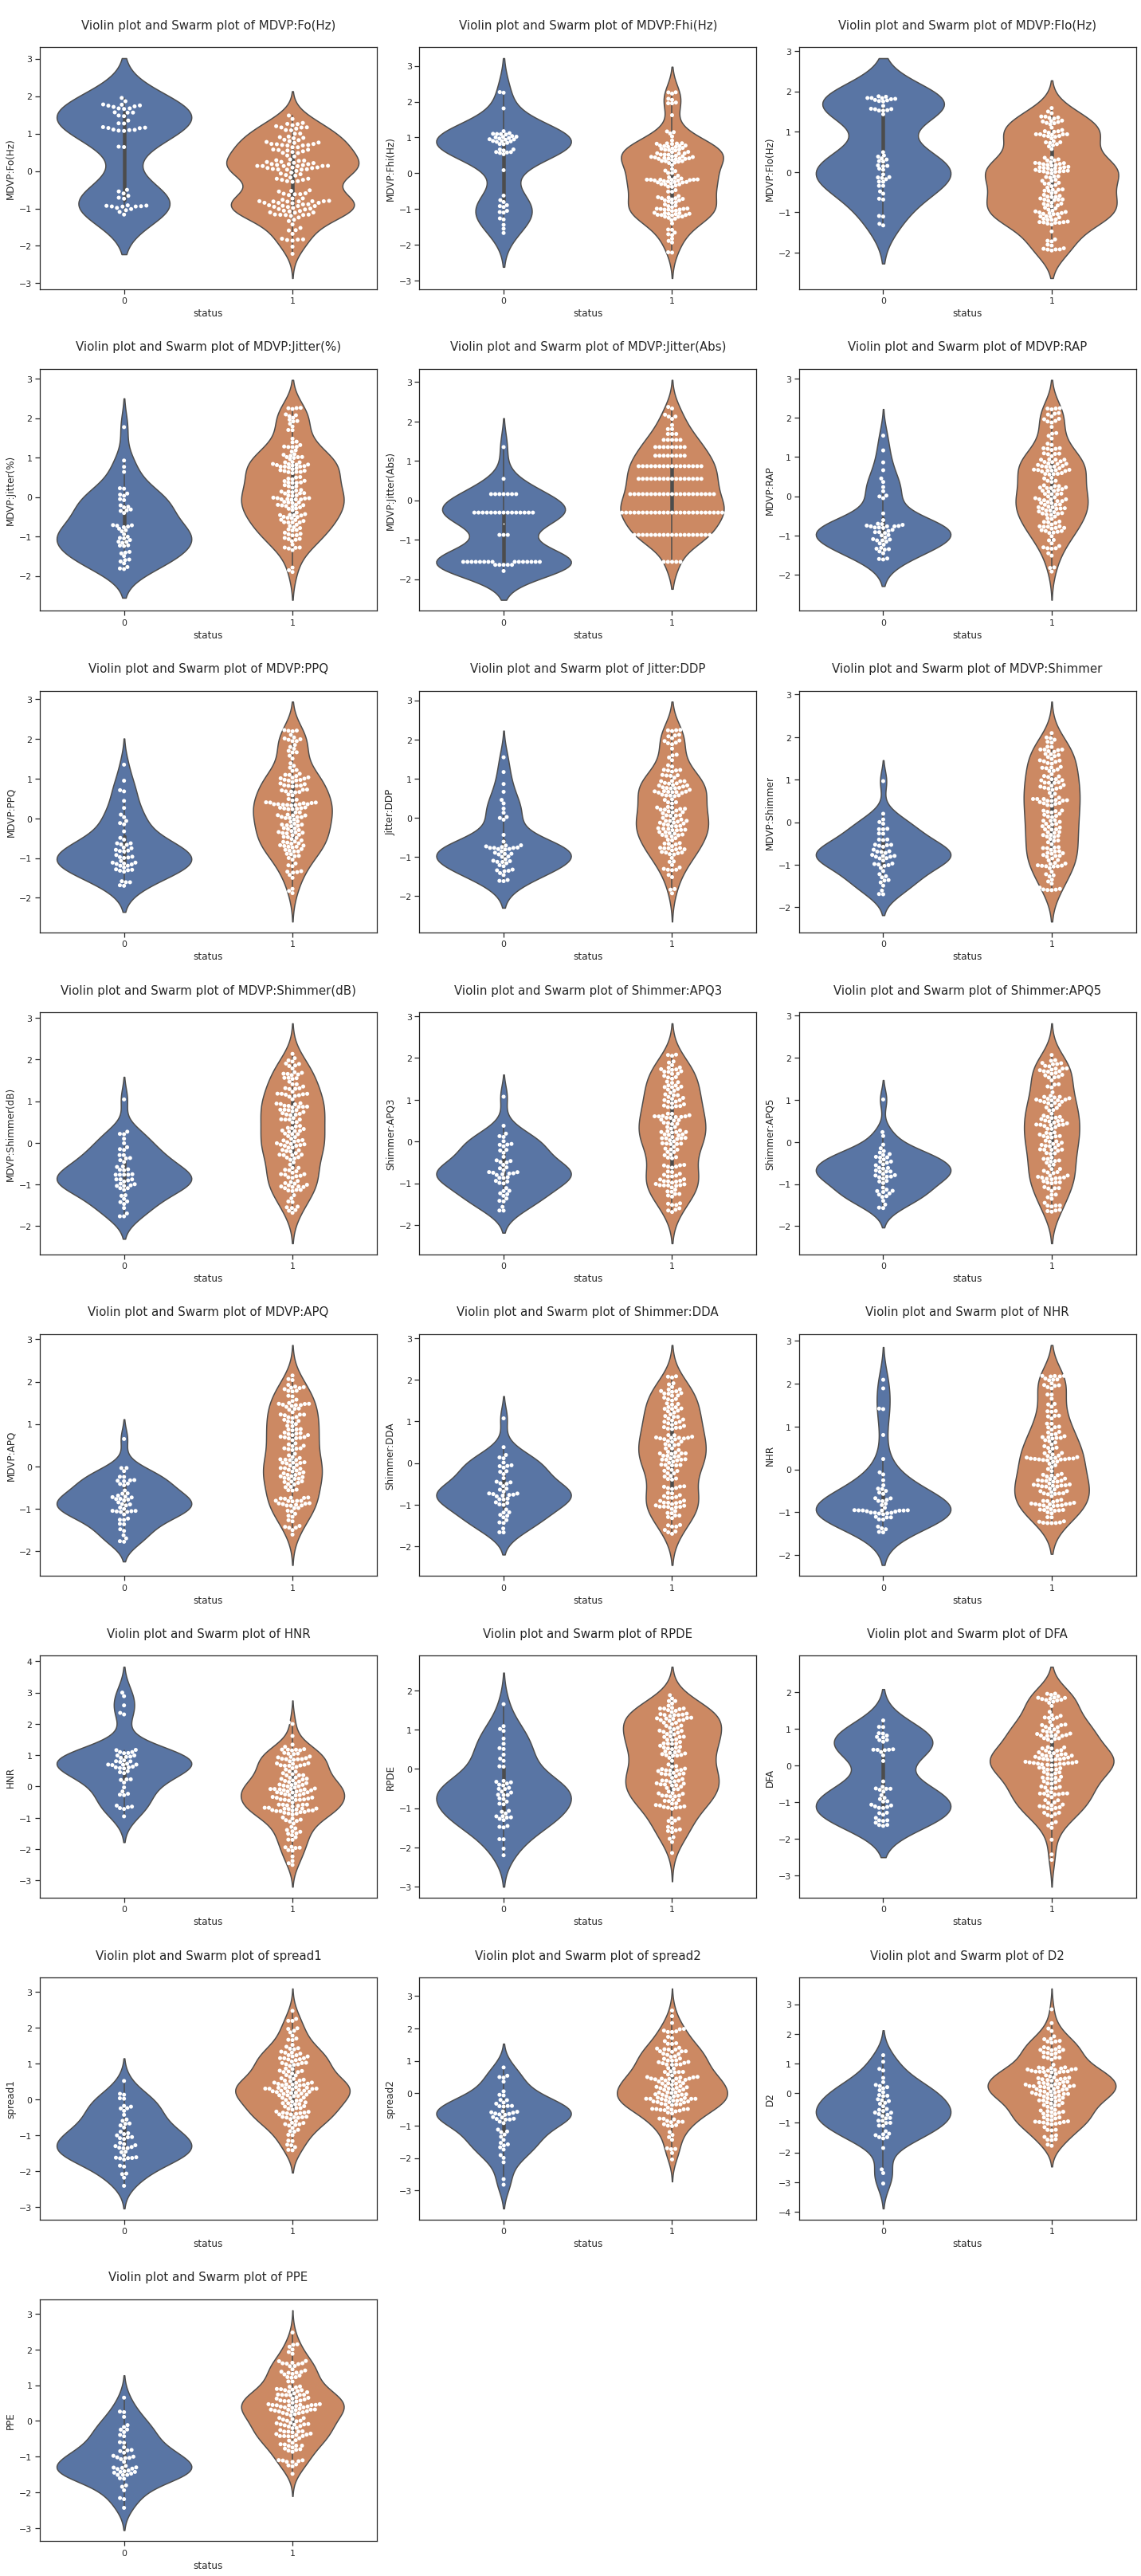

In [ ]:
#@title Visualizing Violin Plot and Swarm plot of attributes
def violin_and_swarm_plot(data):
    fig, ax = plt.subplots(figsize = (20, 45))

    for n, col in enumerate(data.columns):
        try:
            if col != 'status':
                if (data[col].dtype.name == 'int64' or data[col].dtype.name == 'float64'): 
                    plt.subplot(np.ceil(data.shape[1]/3), 3, n+1)
                    sns.violinplot(data=data, x='status', y=col)
                    sns.swarmplot(data=data, x='status', y=col, color='white')
                    plt.title(f"\nViolin plot and Swarm plot of {col}\n", fontdict=dict(fontsize=15))
                    plt.tight_layout();
                else:
                    pass 
        
        except IndexError:
            pass

violin_and_swarm_plot(df_yj)

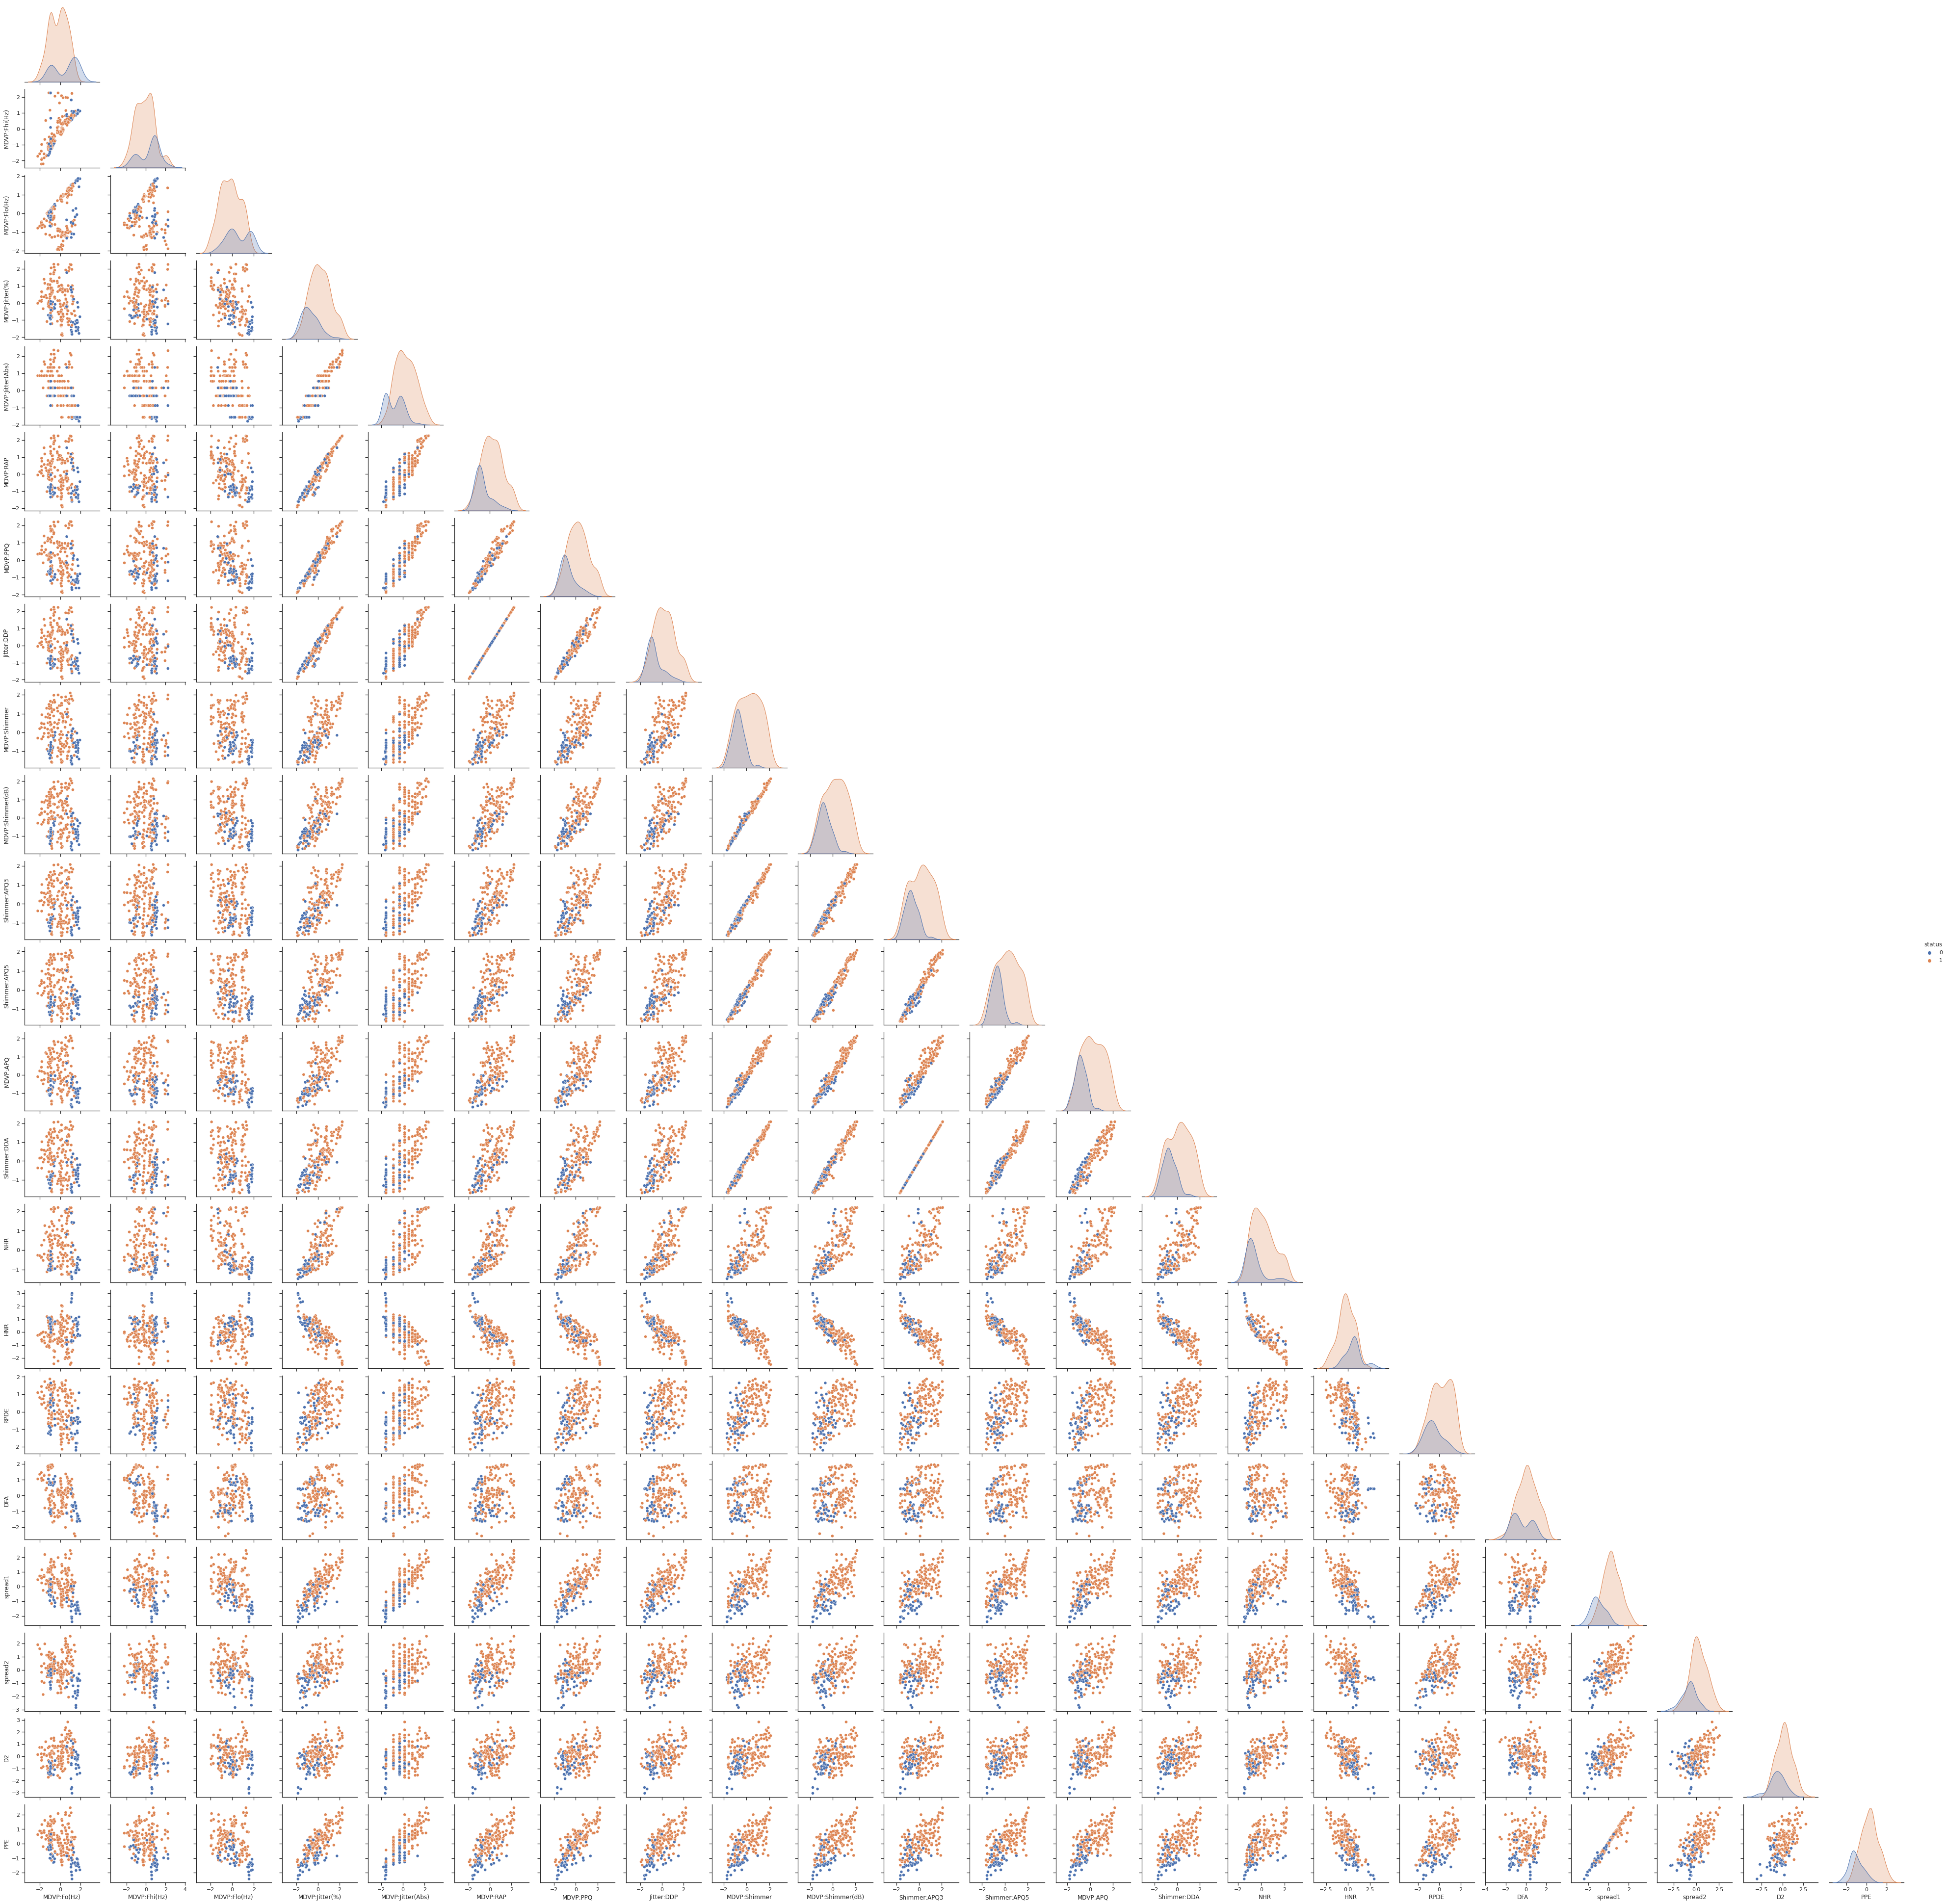

In [ ]:
#@title Visualizing Pairgrid of relation plot and distribution plot
g = sns.PairGrid(df_yj, height=2.5, hue='status', diag_sharey=False, corner=True)
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)
g.add_legend()

# ${\color{green} {Modeling:}} $

## ${\color{lightgreen} {Feature \  Engineering:}} $

### Feature Selection from Feature Importance

In [ ]:
#@title Permutation importance function

from sklearn.inspection import permutation_importance

def feature_importance(model, data):
    # define dataset
    X = data.drop(['status'], axis=1).values
    y = data['status'].values

    # fit the model
    model.fit(X, y)

    # perform permutation importance
    results = permutation_importance(model, X, y, scoring='accuracy', random_state=10)

    # get importance
    importances = results.importances_mean

    # summarize feature importance
    importance_scores = pd.DataFrame([importance for importance in importances], 
                  index=df.drop(['status'], axis=1).columns)
    importance_scores.reset_index(inplace = True)
    importance_scores.columns = ['Feature', 'importance score']

    return importance_scores


             Feature  importance score
0        MDVP:Fo(Hz)          0.005128
1       MDVP:Fhi(Hz)          0.020513
2       MDVP:Flo(Hz)          0.007179
3     MDVP:Jitter(%)          0.006154
4   MDVP:Jitter(Abs)         -0.001026
5           MDVP:RAP          0.011282
6           MDVP:PPQ          0.007179
7         Jitter:DDP          0.011282
8       MDVP:Shimmer          0.003077
9   MDVP:Shimmer(dB)          0.003077
10      Shimmer:APQ3         -0.004103
11      Shimmer:APQ5          0.006154
12          MDVP:APQ          0.004103
13       Shimmer:DDA         -0.005128
14               NHR          0.010256
15               HNR          0.010256
16              RPDE          0.016410
17               DFA          0.017436
18           spread1          0.040000
19           spread2          0.025641
20                D2          0.023590
21               PPE          0.041026


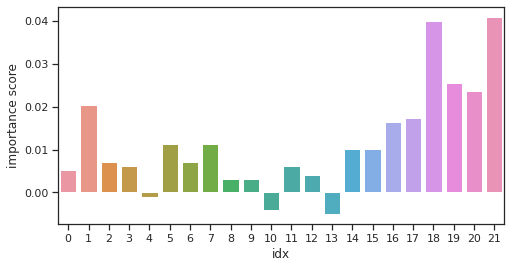

In [ ]:
#@title Display importance scores
from sklearn.svm import SVC
from matplotlib import pyplot

importances = feature_importance(SVC(kernel='rbf', random_state=10), df_yj)

print(importances)
plt.gcf().set_size_inches(8, 4)
plot = sns.barplot(data=importances, x=np.arange(importances.shape[0]), y='importance score')
plot.set(xlabel="idx", ylabel = "importance score")
plt.show()

In [ ]:
#@title Feature Selection

# Several measures of variation in fundamental frequency
frequency_measures = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']

# Several measures of variation in amplitude
amplitude_measures = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

# Selection with importance scores
frequency_measure_selected = frequency_measures.pop(np.abs(importances.set_index('Feature').loc[frequency_measures].values).argmax())
amplitude_measure_selected = amplitude_measures.pop(np.abs(importances.set_index('Feature').loc[amplitude_measures].values).argmax())
dropped_freatures = frequency_measures+amplitude_measures
df_yj_fs = df_yj.drop(dropped_freatures, axis=1)

# ???
selected_features =  pd.Series(df.columns.drop('status'))
for idx, col in enumerate(df.columns):
    if col in dropped_freatures:
        selected_features.drop(idx, inplace=True)

selector = selected_features.index

# Print result
print(f'Number of columns before selection = {df_yj.shape[1]}')
print(f'Number of columns after selection = {df_yj_fs.shape[1]}')
print()
print(f'\'{frequency_measure_selected}\' is selected from several measures of variation in fundamental frequency')
print(f'\'{amplitude_measure_selected}\' is selected from several measures of variation in amplitude')

Number of columns before selection = 23
Number of columns after selection = 14

'MDVP:RAP' is selected from several measures of variation in fundamental frequency
'Shimmer:APQ5' is selected from several measures of variation in amplitude


## ${\color{lightgreen} {Machine \ Learning \ Pipeline:}} $

In [ ]:
#@title Split & Rescale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_yj_fs.drop(['status'], axis=1).values
y = df_yj_fs['status'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# rescale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

number of people in train set
status 0: 119
status 1: 37


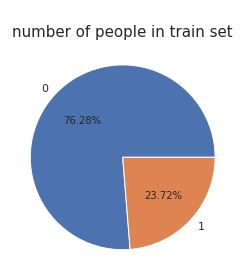

In [ ]:
#@title Display number of people in train set
print('number of people in train set')
print('status 0:', pd.value_counts(y_train)[0])
print('status 1:', pd.value_counts(y_train)[1])

plt.pie(pd.value_counts(y_train), autopct='%.2f%%', labels=[0,1])
plt.title("\nnumber of people in train set", fontdict=dict(fontsize=15))
plt.tight_layout()


number of people in test set
status 0: 28
status 1: 11


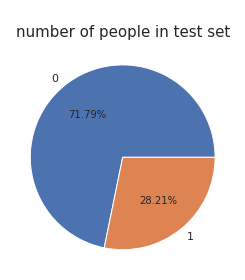

In [ ]:
#@title Display number of people in test set
print('number of people in test set')
print('status 0:', pd.value_counts(y_test)[0])
print('status 1:', pd.value_counts(y_test)[1])

plt.pie(pd.value_counts(y_test), autopct='%.2f%%', labels=[0,1])
plt.title("\nnumber of people in test set", fontdict=dict(fontsize=15))
plt.tight_layout()

## ${\color{lightgreen} {Model \ Selection:}} $

In [ ]:
#@title Compare models function
from sklearn.model_selection import GridSearchCV

def compare_models(models, parameters, dataset):
    performances = pd.DataFrame(columns = ['Model Name', 'Best Parameters', 'Best CV Train Accuracy', 'Best CV Test Accuracy', 'Test Accuracy'])
    X_train, X_test, y_train, y_test = dataset

    for idx in range(len(models)):
        gs = GridSearchCV(models[idx], parameters[idx], cv=5, return_train_score=True)
        gs.fit(X_train, y_train)

        performances.loc[idx, 'Model Name'] = models[idx].__class__.__name__
        performances.loc[idx, 'Best Parameters'] = str(gs.best_params_)
        performances.loc[idx, 'Best CV Train Accuracy'] = gs.cv_results_['mean_train_score'][gs.best_index_]
        performances.loc[idx, 'Best CV Test Accuracy'] = gs.best_score_
        performances.loc[idx, 'Test Accuracy'] = gs.score(X_test, y_test)

    return performances

In [ ]:
#@title Hyperparameters
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

models = [
    SVC(random_state=10),
    DecisionTreeClassifier(random_state=10),
    LogisticRegression(random_state=10),
    KNeighborsClassifier(),
    SGDClassifier(random_state=10)
]

parameters = [
    # Support Vector Machines
    {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 
    'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
    'gamma': ('scale', 'auto'),
    },

    # Decision Trees
    {
    'criterion': ('gini', 'entropy', 'log_loss'),
    'splitter': ('best', 'random'), 
    'max_depth': np.arange(5,16),
    },

    # Logistic Regression
    {
    'penalty':('l1', 'l2', 'elasticnet', 'none'),
    'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
    'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    },

    # k-Nearest Neighbors
    {
    'n_neighbors': np.arange(3,12,2),
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    },

    # Stochastic Gradient Descent
    {
    'loss': ('hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
    'penalty':('l1', 'l2', 'elasticnet'),
    'max_iter': np.arange(10,101,10),
    },
]

SVC with {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
DecisionTreeClassifier with {'criterion': 'gini', 'max_depth': 9, 'splitter': 'random'}
LogisticRegression with {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
KNeighborsClassifier with {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
SGDClassifier with {'loss': 'perceptron', 'max_iter': 20, 'penalty': 'elasticnet'}


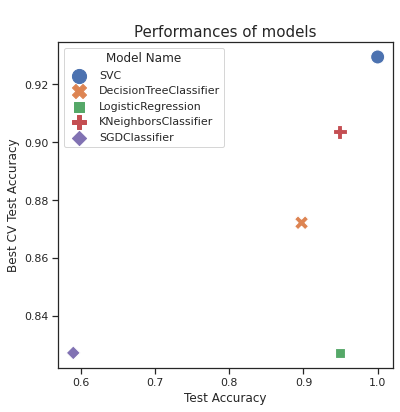

In [ ]:
#@title Model Validation
results = compare_models(models, parameters, (X_train, X_test, y_train, y_test))

# Print model and best parameters
for idx in range(results.shape[0]):
    print(f"{results['Model Name'][idx]} with {results['Best Parameters'][idx]}")

# Plot performances
plt.gcf().set_size_inches(6, 6)
plot = sns.scatterplot(data=results, x="Test Accuracy", y="Best CV Test Accuracy", hue="Model Name", style="Model Name", size="Model Name", sizes=(200,200))
plot.set(xlabel="Test Accuracy", ylabel = "Best CV Test Accuracy")
plt.title("\nPerformances of models", fontdict=dict(fontsize=15))
plt.show()


 train results 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.99      0.99      0.99       119

    accuracy                           0.99       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156


 test results 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        28

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Text(21.5, 0.5, 'Actual')

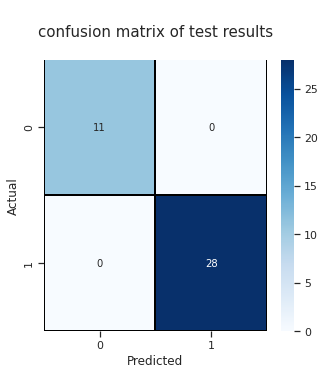

In [ ]:
#@title Results
from sklearn.metrics import classification_report, confusion_matrix

svm_clf = SVC(C=5, kernel='rbf', gamma='scale', random_state=10)
svm_clf.fit(X_train, y_train)

print('\n train results \n')
svm_y_train_pred = svm_clf.predict(X_train)
print(classification_report(y_train, svm_y_train_pred))

print('\n test results \n')
svm_y_test_pred = svm_clf.predict(X_test)
print(classification_report(y_test, svm_y_test_pred))

# Plot confusion_matrix
cm = confusion_matrix(svm_y_test_pred, y_test)
plt.figure(figsize = (5,5))
plt.title('\nconfusion matrix of test results\n',{'fontsize':15})
sns.heatmap(cm, cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")